In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


In [33]:
true_df = pd.read_csv("fake-news/true.csv")
fake_df = pd.read_csv("fake-news/fake.csv")
true_df["class_label"] = False
fake_df["class_label"] = True
all_df = pd.concat([true_df, fake_df], ignore_index=True)


In [34]:
all_df


,title,text,subject,date,class_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",False
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",False
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",False
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",False
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",False
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",True
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",True
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",True
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",True


In [35]:
all_df["date"] = pd.to_datetime(all_df["date"], format="mixed", errors="coerce")


In [36]:
all_date_df = all_df[all_df["date"].notnull()].reset_index(drop=True)
all_date_df = all_date_df.set_index("date")
all_date_df


,title,text,subject,class_label
date,,,,
2017-12-31,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,False
2017-12-29,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,False
2017-12-31,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,False
2017-12-30,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,False
2017-12-29,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,False
...,...,...,...,...
2016-01-16,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,True
2016-01-16,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,True
2016-01-15,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,True


In [61]:
month_group = all_date_df["class_label"].groupby(pd.Grouper(freq='M'))
month_group.mean()



date
2015-03-31    1.000000
2015-04-30    1.000000
2015-05-31    1.000000
2015-06-30    1.000000
2015-07-31    1.000000
2015-08-31    1.000000
2015-09-30    1.000000
2015-10-31    1.000000
2015-11-30    1.000000
2015-12-31    1.000000
2016-01-31    0.814619
2016-02-29    0.702479
2016-03-31    0.689480
2016-04-30    0.718382
2016-05-31    0.719772
2016-06-30    0.675194
2016-07-31    0.723178
2016-08-31    0.770959
2016-09-30    0.727273
2016-10-31    0.763047
2016-11-30    0.611822
2016-12-31    0.681170
2017-01-31    0.578415
2017-02-28    0.597959
2017-03-31    0.609143
2017-04-30    0.597181
2017-05-31    0.620871
2017-06-30    0.594161
2017-07-31    0.589977
2017-08-31    0.547521
2017-09-30    0.171429
2017-10-31    0.160180
2017-11-30    0.144515
2017-12-31    0.150000
2018-01-31         NaN
2018-02-28    1.000000
Freq: M, Name: class_label, dtype: float64

In [49]:
import seaborn as sns


In [47]:
month_group.mean()


date
2015-03-31    1.000000
2015-04-30    1.000000
2015-05-31    1.000000
2015-06-30    1.000000
2015-07-31    1.000000
2015-08-31    1.000000
2015-09-30    1.000000
2015-10-31    1.000000
2015-11-30    1.000000
2015-12-31    1.000000
2016-01-31    0.814619
2016-02-29    0.702479
2016-03-31    0.689480
2016-04-30    0.718382
2016-05-31    0.719772
2016-06-30    0.675194
2016-07-31    0.723178
2016-08-31    0.770959
2016-09-30    0.727273
2016-10-31    0.763047
2016-11-30    0.611822
2016-12-31    0.681170
2017-01-31    0.578415
2017-02-28    0.597959
2017-03-31    0.609143
2017-04-30    0.597181
2017-05-31    0.620871
2017-06-30    0.594161
2017-07-31    0.589977
2017-08-31    0.547521
2017-09-30    0.171429
2017-10-31    0.160180
2017-11-30    0.144515
2017-12-31    0.150000
2018-01-31         NaN
2018-02-28    1.000000
Freq: M, Name: class_label, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


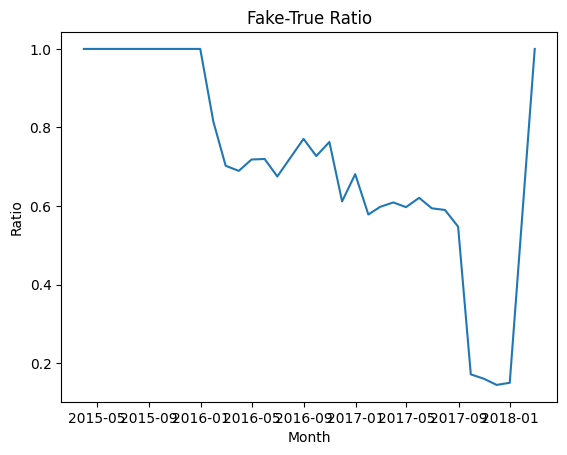

In [62]:
ax = sns.lineplot(month_group.mean()).set(title="Fake-True Ratio", ylabel="Ratio", xlabel="Month")


In [3]:
all_df


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [4]:
from wordcloud import WordCloud
from io import StringIO


In [5]:
si = StringIO()
all_df.apply(lambda x: si.write(x["title"] + " " + x["text"]), axis=1)
s=si.getvalue()
si.close()


In [71]:
wordcloud = WordCloud(width=1920, height=1080, background_color="white",max_font_size=192, relative_scaling=.75, max_words=len(s)).generate(s)


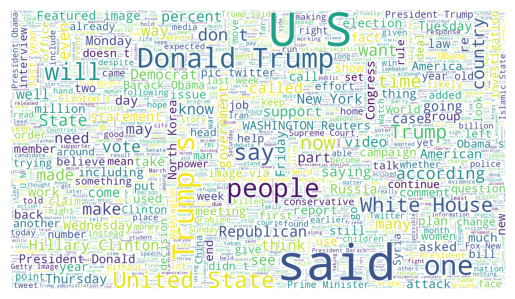

In [72]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [18]:
true_cv = CountVectorizer()
true_res = true_cv.fit_transform(true_df.apply(lambda x: " ".join([x["title"], x["text"]]).lower(), axis=1))
fake_cv = CountVectorizer()
fake_res = fake_cv.fit_transform(fake_df.apply(lambda x: " ".join([x["title"], x["text"]]).lower(), axis=1))


In [19]:
true_cv_df = pd.DataFrame(true_res.sum(axis=0), columns=true_cv.vocabulary_)
true_cv_df.T[0].sort_values(ascending=False).head(10)


enrol            483025
sori             253553
clemmons         208288
exams            186315
beneficiaries    182698
onder            111938
nl8n1ns3m0        99076
akayev            88376
defunding         82670
iod               60261
Name: 0, dtype: int64

In [20]:
fake_cv_df = pd.DataFrame(fake_res.sum(axis=0), columns=fake_cv.vocabulary_)
fake_cv_df.T[0].sort_values(ascending=False).head(10)


sorbet         549857
jfndizcax5     300329
janeygodley    241808
crass          230637
infantry       175881
clarkston      152724
amous          114077
railway         98313
rojas           88638
cinch           87279
Name: 0, dtype: int64